# Bayesian Statistics

## Scenario

Two species of costal birds: **cormorants** $C$ and **seagulls** $S$.

### Unknown

We do not know the population distribution.

### Two recommended models

1) M1: 75% cormorants and 25% seagulls

2) M2: 50% cormorants and 50% seagulls

### Goal: Determine if model 1 is true.

Probability that model 1 is true - $p(M1)$

$p(M1) = p(A)$

$p(C or S) = p(B)$

### Bayes' theorem:

Used to **updated the probability** of a hypothesis being true

**as more data presents itself.**

$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} $

$ \rightarrow p(H|E) = \frac{p(E|H)p(H)}{p(E)}$

$H$: Hypothesis - Model 1

$E$: Event - seeing a cormorant or a seagull

In our case:

$ p(M1| C ) = \frac{p(C|M1)p(M1)}{p(C)}$ - prob M1 is true given we saw a cormorant

$ p(M1| S ) = \frac{p(S|M1)p(M1)}{p(S)}$ - prob M1 is true given we saw a seagull

In this lab, $p(C)$ and $p(S)$ are not given and need to calculated.

Probability of any event occurring:

$p(E) = p(E|H)p(H) + p(E|\lnot H)p(\lnot H)$

$ p(C) = p(C|M1)p(M1) + p(C|M2)p(M2)$

By conservation of probability $p(S) + p(C) = 1$

$ p(S) = 1 -  p(C)$

### Reminder of goal: p(M1)

Once we know $p(M1|C)$ or $p(M1|S)$

we can update $p(M1)$:

$p(M1) = p(M1|C)$

or 

$p(M1) = p(M1|S)$

In [1]:
#IMPORT LIBRARIES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Find 

$p(C|M1)$ - prob seeing C given model 1

$p(S|M1)$ - prob seeing S given model 1

$p(C|M2)$ - prob seeing C given model 2

$p(S|M2)$ - prob seeing S given model 2

$p(M1)$ - prob of choosing M1 to be true

$p(M2) = 1 - p(M1)$ - prob of choosing M2 to be true

$p(C)$  - prob of seeing a seagull

$p(S) = 1 - p(C)$  - prob of seeing a cormorant


In [2]:
#INPUT GIVEN INFO

#1) M1: 75% cormorants and 25% seagulls
#2) M2: 50% cormorants and 50% seagulls

model1 = np.array( [ 0.75 , 0.25 ] ) #p(C|M1) and p(S|M1)
model2 = np.array( [ 0.5 , 0.5 ] ) #p(C|M2) and p(S|M2)

#3) Until we are given more information
#there is an equal chance either model is true
probM1_M2 = np.array( [ 0.5 , 0.5 ] ) #p(M1) and p(M2)
#THESE TWO NUMBERS REPRESENT p(A) and p(-A)


To find $p(C)$ and $p(S)$ use:

$p(B) = p(B|A)p(A) + p(B|\lnot A)p(\lnot A)$

Let $B = C$ and $A = M1$

$ \rightarrow p(C) = p(C|M1)p(M1) + p(C|\lnot M1)p(\lnot M1)$

$ p(C) = p(C|M1)p(M1) + p(C|M2)p(M2)$

$ p(S) = 1 -  p(C)$

In [3]:
#Find p(C) and p(S)

probC = model1[0] * probM1_M2[0] + model2[0] * probM1_M2[1]
probS = 1 - probC


#### Event 1 - We saw a cormorant

$p(M1|C) =  \frac{p(C|M1)p(M1)}{p(C)}$

In [4]:
#P(M1|C) = P(C|M1) * P(M1) /P(C)
probM1_given_C = model1[0] * probM1_M2[0] / probC
probM1_given_C

0.6

In [5]:
#REDEFINE THE PRIORS
#p(M1) = P(M1|C)
#p(M2) = 1 - P(M1|C)
probM1_M2[0] = probM1_given_C
probM1_M2[1] = 1 - probM1_given_C
probM1_M2

array([0.6, 0.4])

#### Event 2 - We saw another cormorant

$p(M1|C) =  \frac{p(C|M1)p(M1)}{p(C)}$

In [6]:
#Find p(C) and p(S)

probC = model1[0] * probM1_M2[0] + model2[0] * probM1_M2[1]
probS = 1 - probC

#P(M1|C) = P(C|M1) * P(M1) /P(C)

probM1_given_C = model1[0] * probM1_M2[0] / probC
probM1_given_C

0.6923076923076923

In [7]:
#REDEFINE THE PRIORS
#p(M1) = P(M1|C)
#p(M2) = 1 - P(M1|C)
probM1_M2[0] = probM1_given_C #prob M1 is true
probM1_M2[1] = 1 - probM1_given_C #prob M1 is not true - prob M2
probM1_M2

array([0.69230769, 0.30769231])

#### Event 3 - We saw a seagull.

$p(M1|S) =  \frac{p(S|M1)p(M1)}{p(S)}$

In [8]:
#P(M1|S) = P(S|M1) * P(M1) /P(S)
probC = model1[0] * probM1_M2[0] + model2[0] * probM1_M2[1]
probS = 1 - probC

#P(M1|S) = P(S|M1) * P(M1) /P(S)
probM1_given_S = model1[1] * probM1_M2[0] / probS
probM1_given_S

0.5294117647058822

In [9]:
#REDEFINE THE PRIORS
#p(M1) = P(M1|C)
#p(M2) = 1 - P(M1|C)
probM1_M2[0] = probM1_given_S #prob M1 is true
probM1_M2[1] = 1 - probM1_given_S #prob M1 is not true - prob M2
probM1_M2

array([0.52941176, 0.47058824])

In [10]:
#Script
#automate this task
bird = 'C' #the curren event

#M1: 75% cormorants and 25% seagulls
#M2: 50% cormorants and 50% seagulls
model1 = np.array( [ 0.75 , 0.25 ] ) #p(C|M1) and p(S|M1)
model2 = np.array( [ 0.5 , 0.5 ] ) #p(C|M2) and p(S|M2)

#Until we are given more information
#there is an equal chance either model is true
probM1_M2 = np.array( [ 0.5 , 0.5 ] ) #p(M1) and p(M2)
#THESE TWO NUMBERS REPRESENT p(A) and p(-A)

#Find p(C) and p(S)

probC = model1[0] * probM1_M2[0] + model2[0] * probM1_M2[1]
probS = 1 - probC

if bird == 'C':
    #P(M1|C) = P(C|M1) * P(M1) /P(C)
    probM1_given_C = model1[0] * probM1_M2[0] / probC
    probM1_M2[0] = probM1_given_C #prob M1 is true
    probM1_M2[1] = 1 - probM1_given_C #prob M1 is not true - prob M2
else: #if the bird == 'S'
    probM1_given_S = model1[1] * probM1_M2[0] / probS
    probM1_M2[0] = probM1_given_S #prob M1 is true
    probM1_M2[1] = 1 - probM1_given_S #prob M1 is not true - prob M2

probM1_M2

array([0.6, 0.4])

In [11]:
birds = ['C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C']

#M1: 75% cormorants and 25% seagulls
#M2: 50% cormorants and 50% seagulls
model1 = np.array( [ 0.75 , 0.25 ] ) #p(C|M1) and p(S|M1)
model2 = np.array( [ 0.5 , 0.5 ] ) #p(C|M2) and p(S|M2)

#Until we are given more information
#there is an equal chance either model is true
probM1_M2 = np.array( [ 0.5 , 0.5 ] ) #p(M1) and p(M2)
#THESE TWO NUMBERS REPRESENT p(A) and p(-A)

propM1_list = []
propM2_list = []
for i in birds:
    #Find p(C) and p(S)
    probC = model1[0] * probM1_M2[0] + model2[0] * probM1_M2[1]
    probS = 1 - probC
    #WHICH EVENT
    if i == 'C':
        #P(M1|C) = P(C|M1) * P(M1) /P(C)
        probM1_given_C = model1[0] * probM1_M2[0] / probC
        probM1_M2[0] = probM1_given_C #prob M1 is true
        probM1_M2[1] = 1 - probM1_given_C #prob M1 is not true - prob M2
    else: #if the bird == 'S'
        probM1_given_S = model1[1] * probM1_M2[0] / probS
        probM1_M2[0] = probM1_given_S #prob M1 is true
        probM1_M2[1] = 1 - probM1_given_S #prob M1 is not true - prob M2
    propM1_list.append( probM1_M2[0] )
    propM2_list.append( probM1_M2[1] )

In [12]:
propM1_list

[0.6,
 0.42857142857142844,
 0.5294117647058821,
 0.6279069767441857,
 0.7168141592920352,
 0.791530944625407,
 0.8506417736289379,
 0.8952108063855913,
 0.8103001111522783,
 0.864996704021094,
 0.9057567530256314,
 0.9351334230738775,
 0.8781695691616719,
 0.9153417281985828,
 0.8438987209108444,
 0.8902202262398715,
 0.9240336270824939,
 0.9480400141681661,
 0.9647494704399424,
 0.9762202304703832]

In [13]:
propM2_list

[0.4,
 0.5714285714285716,
 0.47058823529411786,
 0.3720930232558143,
 0.2831858407079648,
 0.20846905537459304,
 0.1493582263710621,
 0.10478919361440875,
 0.1896998888477217,
 0.13500329597890603,
 0.09424324697436859,
 0.06486657692612252,
 0.12183043083832812,
 0.08465827180141716,
 0.1561012790891556,
 0.10977977376012849,
 0.07596637291750608,
 0.05195998583183392,
 0.035250529560057586,
 0.0237797695296168]

11. Plot your list using the `sns.lineplot` command. The basic syntax is `sns.lineplot(x,y)`. You can use `range` to generate a list of x-values and then use array arithmetic to calculate y-values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability of Model 1 being true')

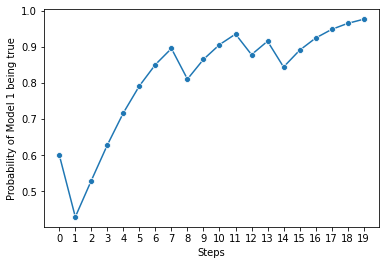

In [14]:
#TODO

x_values = list(range(len(birds)))
sns.lineplot(x_values, propM1_list, marker='o')

plt.xticks(x_values)
plt.xlabel("Steps")
plt.ylabel("Probability of Model 1 being true")